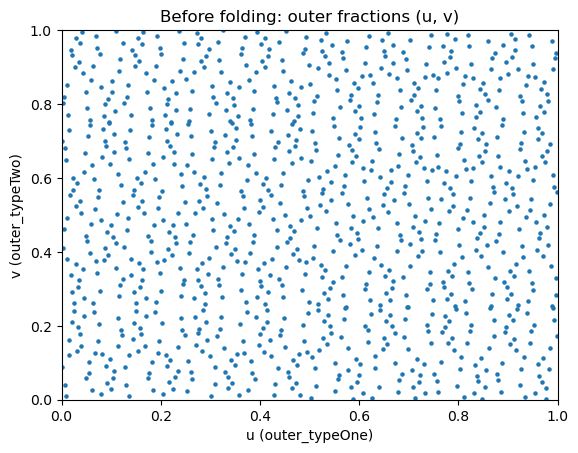

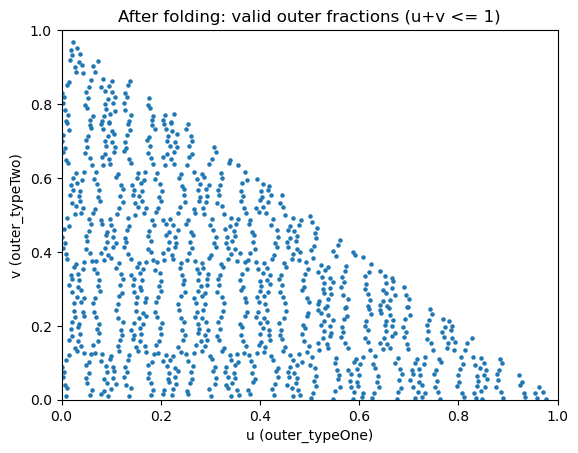

Saved animation to sobol_unit_square.gif


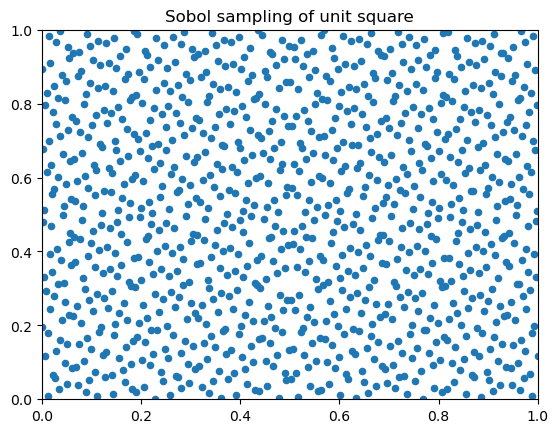

In [6]:
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ----- Part 1: static plots (outer fractions fold) -----
# Generate Sobol samples in [0,1]^12
dim = 12
sampler = qmc.Sobol(d=dim, scramble=True, seed=42)
U = sampler.random(1024)  # 1024 points

# Extract the outer fraction pair (dims 8 and 9)
uv = U[:, 8:10].copy()

# Plot before folding
plt.figure()
plt.scatter(uv[:, 0], uv[:, 1], s=5)
plt.title('Before folding: outer fractions (u, v)')
plt.xlabel('u (outer_typeOne)')
plt.ylabel('v (outer_typeTwo)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# Apply the folding trick
mask = (uv.sum(axis=1) > 1)
uv_folded = uv.copy()
uv_folded[mask] = 1 - uv_folded[mask]

# Plot after folding
plt.figure()
plt.scatter(uv_folded[:, 0], uv_folded[:, 1], s=5)
plt.title('After folding: valid outer fractions (u+v <= 1)')
plt.xlabel('u (outer_typeOne)')
plt.ylabel('v (outer_typeTwo)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# ----- Part 2: animation of Sobol in unit square -----
# Generate 2D Sobol sequence
sampler2 = qmc.Sobol(d=2, scramble=True, seed=42)
points = sampler2.random(1024)  # 1024 points

fig, ax = plt.subplots()
scat = ax.scatter([], [], s=20)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Sobol sampling of unit square')

def init():
    # initialize with empty 0×2 array
    scat.set_offsets(np.empty((0, 2)))
    return scat,

def update(i):
    data = points[:i+1]
    scat.set_offsets(data)
    return scat,

# Create animation: 1024 frames
ani = FuncAnimation(fig, update, frames=len(points),
                    init_func=init, blit=True)

# Save as GIF at ~102 FPS to complete in ~10 seconds
fps = len(points) / 0.05
writer = PillowWriter(fps=fps)
ani.save('sobol_unit_square.gif', writer=writer)
print('Saved animation to sobol_unit_square.gif')
